##Clustering Assessment: Iris Dataset
Objective

The objective of this assessment is to evaluate your understanding and ability to apply clustering techniques to a real-world dataset. We will apply KMeans and Hierarchical Clustering on the Iris dataset and visualize the results.

###1. Loading and Preprocessing

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# Load Iris dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Preview the dataset
print(df.head())




   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [3]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [6]:
df.shape

(150, 4)

In [7]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
df.duplicated().sum()

np.int64(1)

##2. Clustering Algorithm Implementation

###Brief Description:

KMeans partitions the dataset into k clusters by minimizing the distance between each point and its cluster centroid.

Steps: Initialize centroids → Assign points → Update centroids → Repeat until convergence.

###Why suitable for Iris:

Small dataset with numeric features.

Clusters are roughly spherical and well-separated.

###Implementation:

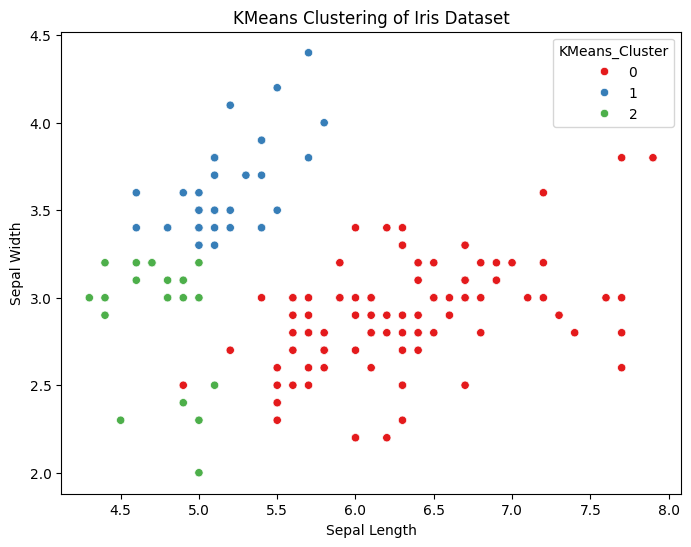

In [12]:
from sklearn.cluster import KMeans

# Apply KMeans with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Add cluster labels to DataFrame
df['KMeans_Cluster'] = kmeans_labels

# Visualize clusters (using first two features)
plt.figure(figsize=(8,6))
sns.scatterplot(x=df.iloc[:,0], y=df.iloc[:,1], hue='KMeans_Cluster', data=df, palette='Set1')
plt.title("KMeans Clustering of Iris Dataset")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.show()


## Hierarchical Clustering (4 marks)

###Brief Description:

Hierarchical clustering builds a dendrogram by iteratively merging or splitting clusters.

Agglomerative (bottom-up) or Divisive (top-down) approaches exist.

###Why suitable for Iris:

Does not require predefined cluster number (though we can cut the dendrogram later).

Helps visualize similarity among samples.

###Implementation:

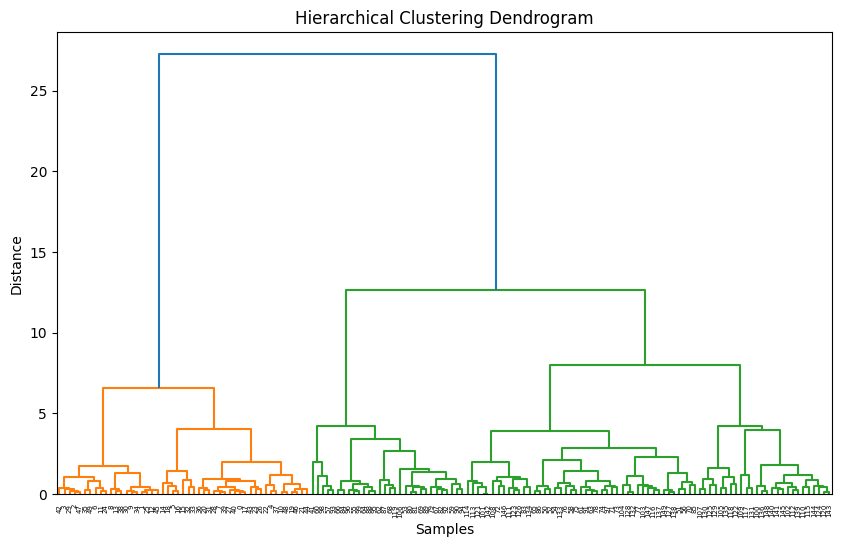

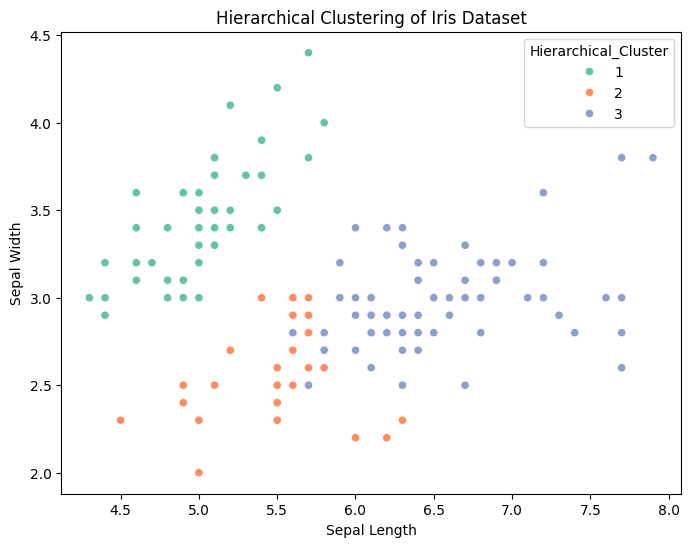

In [13]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# Compute linkage matrix using Ward's method
Z = linkage(X_scaled, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 6))
dendrogram(Z)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

# Assign cluster labels (choose 3 clusters)
hier_labels = fcluster(Z, 3, criterion='maxclust')
df['Hierarchical_Cluster'] = hier_labels

# Visualize clusters (first two features)
plt.figure(figsize=(8,6))
sns.scatterplot(x=df.iloc[:,0], y=df.iloc[:,1], hue='Hierarchical_Cluster', data=df, palette='Set2')
plt.title("Hierarchical Clustering of Iris Dataset")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.show()
